In [40]:
# Main notebook for playing around and looking at different things in data
import numpy as np
import pandas as pd
import scipy.stats as ss
corr = ss.pearsonr

pd.set_option('display.max_rows', 600)
pd.set_option('display.min_rows', 50)
#import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm # Colormaps
import matplotlib.dates as mdates

from matplotlib.dates import MonthLocator, DateFormatter


#%matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rcParams["image.cmap"] = "inferno"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
#%matplotlib widget  
# plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_TIME,"Danish")
# ax = plt.gca()
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y \n %B'))


import os
# import csv
import math


import datetime as dt

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]


saveFigures is set to: True
Done loading packages


In [41]:
testing_df = pd.read_csv("testing_data.txt", sep=" ")
#testing_df

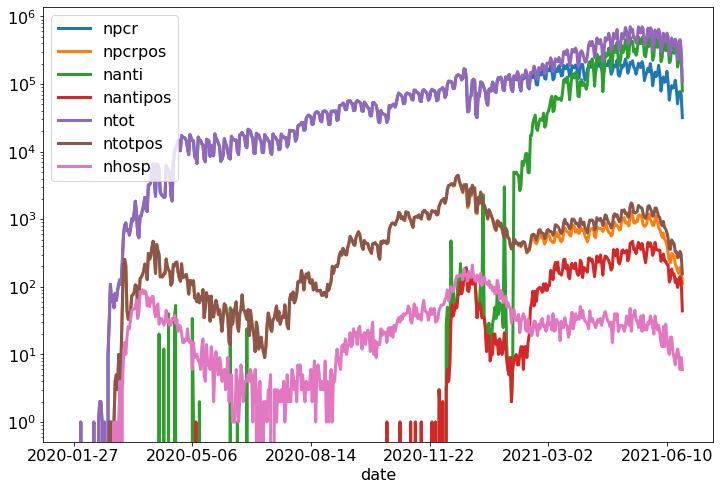

In [42]:
testing_df.plot(x="date")
plt.yscale("log")

In [43]:
if False: 
    fig, ax = plt.subplots()
    ax.plot(testing_df["date"], testing_df["ntotpos"])
    #defines the tick location 
    ax.xaxis.set_major_locator(MonthLocator())
    #defines the label format
    ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax.tick_params(axis="x", labelrotation= 90)

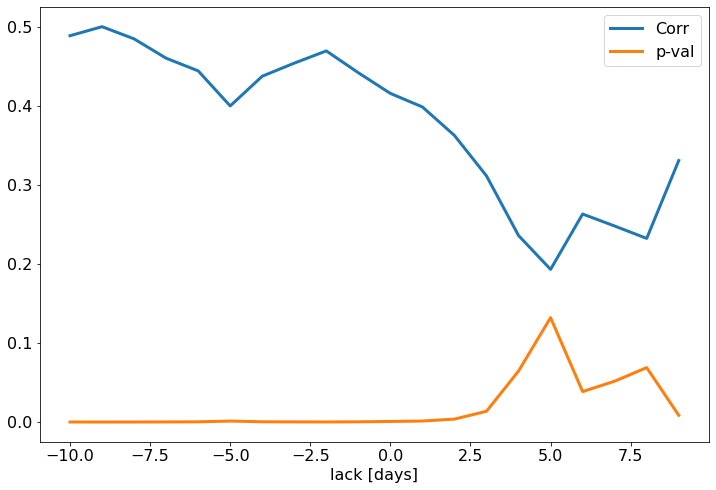

In [59]:
start, stop = "2021-03-01", "2021-05-01"
start, stop = pd.to_datetime(start), pd.to_datetime(stop)

pdtd = lambda l: pd.Timedelta(dt.timedelta(days = l))
datefilt = lambda l: (start + pdtd(l) <= pd.to_datetime(testing_df["date"])) & (pd.to_datetime(testing_df["date"]) <= stop + pdtd(l))


rl = range(-10, 10)

corrs = [corr(testing_df.loc[datefilt(l)].ntotpos, testing_df.loc[datefilt(l)].nhosp) for l in rl]

fig, ax = plt.subplots()
ax.plot(rl, corrs, label=["Corr", "p-val"])
ax.set_xlabel("lack [days]")
ax.legend(["Corr", "p-val"])
